## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

#### Hypothesis:

H0: The data follows a Poisson distribution

H1: The data doesn't follow a Poisson distribution

In [60]:
baseball_freqs = [35,99,104,110,62,25,10,3]

In [68]:
baseball_poisson = []
num = 0
for n in baseball_freqs:
    for i in range(n):
        baseball_poisson.append(num)
    num += 1

In [69]:
print(baseball_poisson)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [109]:
np.mean(baseball_poisson)

2.435267857142857

[Text(0, 0.5, 'Frequency (observed)'), Text(0.5, 0, 'Scores')]

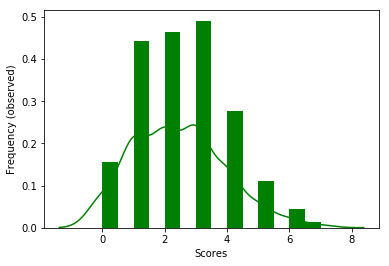

In [91]:
ax = sns.distplot(baseball_poisson,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Scores', ylabel='Frequency (observed)')

[Text(0, 0.5, 'Frequency(modelled)'), Text(0.5, 0, 'Scores')]

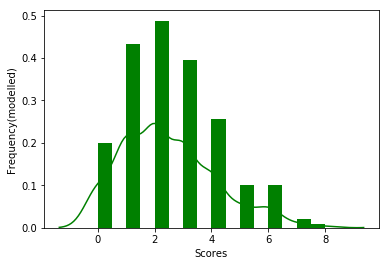

In [114]:
# Simulation of poisson distribution with mu = 2.435

data_test = poisson.rvs(mu=2.435, size=500)
ax = sns.distplot(data_test,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Scores', ylabel='Frequency(modelled)')

In [93]:
stats.ks_2samp(baseball_poisson,data_test)

Ks_2sampResult(statistic=0.03317857142857139, pvalue=0.9541088333252334)

#### Interpretation:
Since the K-S statistic is small and the p-value is high, we cannot reject the hypothesis that the distributions of the two samples are the same. Therefore, this implies that the baseball scores follow a poisson distribution

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [13]:
scores = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]

#### Hypothesis:

H0: The two distributions are the same

H1: The two distributions are different

In [17]:
from scipy import stats
import numpy as np

In [40]:
old = np.random.normal(985,50,10000)

In [41]:
stats.ks_2samp(scores,old)

Ks_2sampResult(statistic=0.16386666666666672, pvalue=0.7787322989655934)

#### Interpretation:
Since the K-S statistic is small and the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

#### Hypothesis:

H0: The data follows a Poisson distribution

H1: The data doesn't follow a Poisson distribution

In [103]:
factory_freqs = [32,15,0,9,4]

In [104]:
factory_poisson = []
num = 0
for n in factory_freqs:
    if num == 2:
        num += 1
        continue
    for i in range(n):
        factory_poisson.append(num)
    num += 1

In [105]:
print(factory_poisson)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]


In [110]:
np.mean(factory_poisson)

0.9666666666666667

[Text(0, 0.5, 'Frequency (observed)'), Text(0.5, 0, 'Number of def. items')]

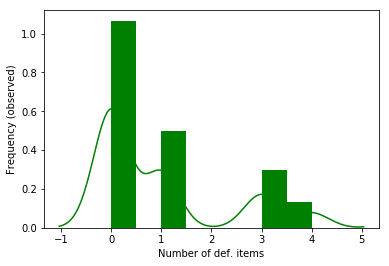

In [107]:
ax = sns.distplot(factory_poisson,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Number of def. items', ylabel='Frequency (observed)')

Just by looking at the graph, it seems that the data doesn't follow a normal distribution, but we can simulate a poisson distribution with a mean of 0.966 in order to be able to compare.

[Text(0, 0.5, 'Frequency(modelled)'), Text(0.5, 0, 'Number of def. items')]

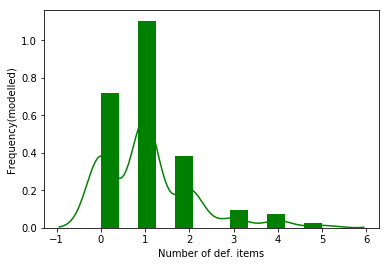

In [113]:
# Simulation of poisson distribution with mu = 0.966

data_test = poisson.rvs(mu=0.966, size=100)
ax = sns.distplot(data_test,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Number of def. items', ylabel='Frequency(modelled)')

In [115]:
stats.ks_2samp(factory_poisson,data_test)

Ks_2sampResult(statistic=0.4673333333333333, pvalue=5.755650418429378e-11)

By comparing the two plots and from the results of the ks test, we conclude that the number of defective items doesn't follow a poisson distribution.

## Question 4
A quality control engineer takes a simple of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [10]:
np.random.binomial(1,0.05,10)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

#### Hypothesis:

H0: No association between patterns of physical activity and the consumption of sugary drinks

H1: There is an association

Chi-statistic = 2.6 + 1.65 + 0.60 + 3.15 + 2.00 + 0.72 = 10.71

Degrees of freedom = (3-1)(2-1) = 2

P-value = 0.0047

#### Conclusion
According to the results of the test, reject H0, suggesting that there is an association between patters of physical activity and the consumption of sugary drinks.